In [1]:
'''
- 여러 규칙을 순차적으로 적용하면서 분류나 예측을 진행하는 단순 알고리즘 모델
- 분류(Classification)와 회귀(Regression)분석에서 모두 사용가능하며,
  분류분석에 주로 사용됨
- 의사결정나무에서 확장된 모델이 랜덤포레스트(Random Forest)이 대표적 ...

- 독립변수 : 연속형 데이터 (숫자값들)
- 종속변수 : 범주형 데이터.. (구분 가능한 값들)


- 순서
 1. 데이터 생성
 2. 전처리
 3. 학습모델 생성(fit()함수 사용)
 4. 모델 테스트(예측) (predict() 함수 사용)
 5. 평가
'''

'\n- 여러 규칙을 순차적으로 적용하면서 분류나 예측을 진행하는 단순 알고리즘 모델\n- 분류(Classification)와 회귀(Regression)분석에서 모두 사용가능하며,\n  분류분석에 주로 사용됨\n- 의사결정나무에서 확장된 모델이 랜덤포레스트(Random Forest)이 대표적 ...\n\n- 독립변수 : 연속형 데이터 (숫자값들)\n- 종속변수 : 범주형 데이터.. (구분 가능한 값들)\n\n\n- 순서\n 1. 데이터 생성\n 2. 전처리\n 3. 학습모델 생성(fit()함수 사용)\n 4. 모델 테스트(예측) (predict() 함수 사용)\n 5. 평가\n'

### exe-1) 사람의 키와 머리카락의 길이로 성별 예측하기
##### - 종속변수 : 성별
##### - 독립변수 : 키, 머리카락 길이

In [3]:
from sklearn import tree

In [7]:
### 데이터 생성
# 독립변수 : x
x = [[180,15],[177,42],[156,35],[174,5],[165,33]]
# 종속변수 : y
y = ['man','women','women','men','women']
label_names = ['height','hair Length']

### 모델 객체 생성하기
# - criterion : 품질측정 방법(지니불순도 방법, 엔트로피 방법)
# ---- 엔트로피 : 균형잡힌 트리를 생성
# ---- 지니불순도 : 가장 빈도 높은 클래스를 먼저 분할하는 방법
# -- random_state : seed 설정과 동일한 개념... 보통 0과 42 숫자 많이 사용
model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
print('model = \m', model)
print('------------------------------')

model = \m DecisionTreeClassifier(criterion='entropy', random_state=0)
------------------------------


In [8]:
### 학습모델 생성 : 
fit = model.fit(x,y)
print("fit = \n",fit)
print('------------------------------')

fit = 
 DecisionTreeClassifier(criterion='entropy', random_state=0)
------------------------------


In [9]:
# 학습모델 평가하기

# 결정계수 ...
# - 값의 범위 : 0~1
# - 1에 가까울 수록 학습모델이 우수함
# - 결과값에 * 100을 하면 백분율로 표시됨
# - 0.3 이상이면 학습모델 선택 고려 ... 

accuracy_score = fit.score(x,y)
print("accuracy_score = ", accuracy_score)

accuracy_score =  1.0


In [10]:
### 예측(테스트) 하기
# test 데이터 생성
mydata = [[171,8]]

# 예측(테스트) 시키기
# 예측 시에는 독립변수만 넣어줍니다. (답은 안알려 줍니다.)
# - 답은 예측결과 ...
pred = fit.predict(mydata)
print("예측결과 : ", pred)

예측결과 :  ['men']


In [13]:
### 시각화 하기
# 라이브러리 설치 : pip install pydotplus
import pydotplus

In [15]:
# conda install -c conda-forge graphviz
# conda 설치 후 실행 오류가 계속 날 경우에는
# pip install graphviz로 설치
import graphviz
import collections

dot_data =  digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="hair Length <= 24.0\nentropy = 1.371\nsamples = 5\nvalue = [1, 1, 3]", fillcolor="#c09cf2"] ;
1 [label="height <= 177.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]", fillcolor="#39e581"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]", fillcolor="#e58139"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]", fillcolor="#8139e5"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
-----------------------
graph =  <pydotplus.graphviz.Dot object at 0x00000196F1E2E0A0>
-----------------------
edges =  defaultdict(<class 'list'>, {})
-----------------------
edges cjfl gn qustn =  defaultdict(<class 'list'>, {'0': [1, 4], '1': [2, 3]})
----------------

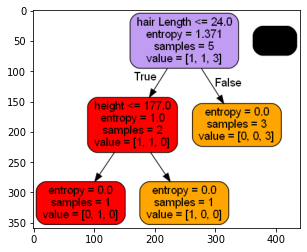

In [17]:
### 그래프 그리기
# model : 위에서 생성한 모델
# feature_names : 독립변수 각항목 이름
# out_file : 파일로 저장할건지 여부
# filled : 도형 안쪽 칠할건지 여부
# rounded : 도형 사각 영역에 라운드 넣을 건지 여부
# 그래프 속성 설정
dot_data = tree.export_graphviz(model, 
                                feature_names = label_names,
                                out_file = None, 
                                filled = True,
                                rounded = True)
print("dot_data = ", dot_data)
print("-----------------------")

# 최종 사용할 그래프
graph = pydotplus.graph_from_dot_data(dot_data)
print("graph = ", graph)
print("-----------------------")

# 독립변수의 갯수 만큼 색상 지정
color = ("red", "orange")

# list type으로 변경
edges = collections.defaultdict(list)
print("edges = ", edges)
print("-----------------------")

### 트리 데이터 생성하기
for e in graph.get_edge_list():
    edges[e.get_source()].append(int(e.get_destination()))

print("edges cjfl gn qustn = ", edges)
print("-----------------------")

### 트리 그리기
for e in edges :
    edges[e].sort()
    
    for i in range(2) :
        dest = graph.get_node(str(edges[e][i]))[0]
        dest.set_fillcolor(color[i])
        
# graph 객체를 이미지 파일로 생성하기
graph.write_png("./tree.png")

import matplotlib.pyplot as plt
# 생성된 png 이미지 읽어 들이기
img = plt.imread("./tree.png")
# 이미지 보여주기
plt.imshow(img)
plt.show()